## Name: Kartabya Krishna
## Registration Number: 210968244
## Date: 2023-08-03
## Lab: 1
## Batch: B2

In [66]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# Load the dataset
cs = pd.read_csv("bodyfat.csv")

In [84]:
# Perform exploratory data analysis (EDA)
# Display the shape and data types of the dataset
print("Dataset Shape:", cs.shape)
print(" ")
print("Data Types:\n", cs.dtypes)

Dataset Shape: (252, 15)
 
Data Types:
 Density    float64
BodyFat    float64
Age          int64
Weight     float64
Height     float64
Neck       float64
Chest      float64
Abdomen    float64
Hip        float64
Thigh      float64
Knee       float64
Ankle      float64
Biceps     float64
Forearm    float64
Wrist      float64
dtype: object


In [85]:
# Check for null and missing values in the dataset
null_values = cs.isnull().sum()
print("Null Values in the Dataset:\n", null_values)

Null Values in the Dataset:
 Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64


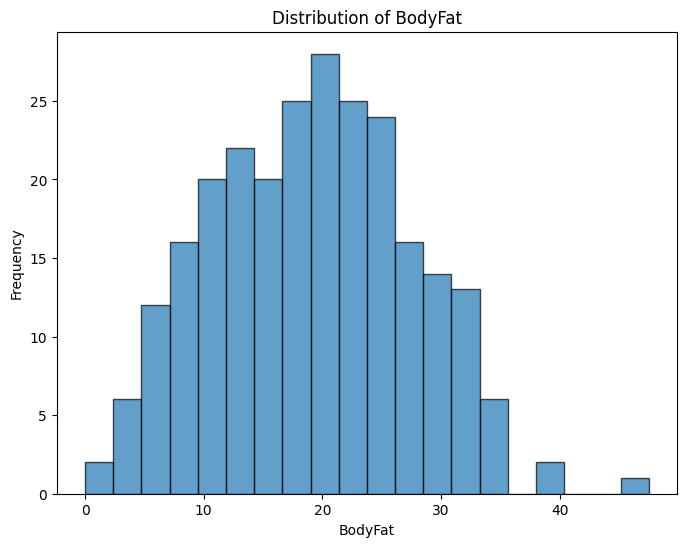

In [70]:
# Let's visualize the distribution of the target variable (BodyFat)
plt.figure(figsize=(8, 6))
plt.hist(cs['BodyFat'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of BodyFat')
plt.xlabel('BodyFat')
plt.ylabel('Frequency')
plt.show()

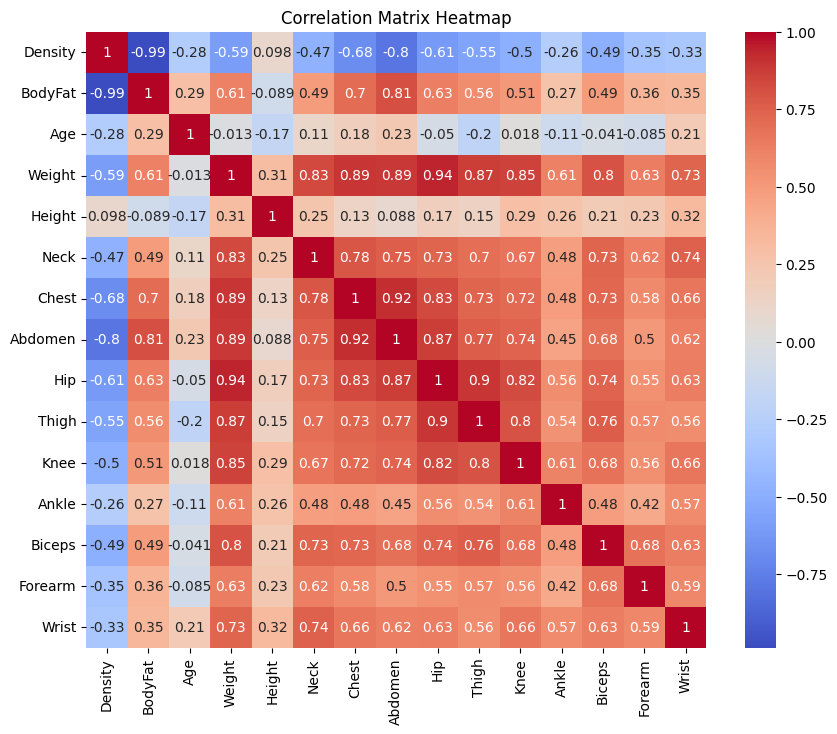

In [71]:
# Correlation matrix heatmap
corr_matrix = cs.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [72]:
# Display the first few rows of the dataset
cs.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [73]:
# Separate features (x) and target variable (y)
x = cs.drop('BodyFat', axis=1)
y = cs['BodyFat']

In [74]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=50, test_size=0.20, shuffle=True)

## Exercise 1:
## Accurate measurement of body fat is inconvenient/costly and it is desirable to have easy methods of predicting Body Fat. Using the Body Fat dataset, write a Neural Network to predict body fat:

## *a. Number of Hidden layers = 3 and number of units are 128,64,32*

In [75]:
# Build the Neural Network model
model = Sequential([
    # First hidden layer with 128 units and ReLU activation
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    
    # Second hidden layer with 64 units and ReLU activation
    Dense(64, activation='relu'),
    
    # Third hidden layer with 32 units and ReLU activation
    Dense(32, activation='relu'),
    
    # Output layer with 1 unit (regression task, predicting BodyFat)
    Dense(1)
])

In [76]:
# Compile the model with Adam optimizer and RMSE loss
learning_rate = 0.1
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss=tf.keras.losses.MeanSquaredError())

In [77]:
# Display the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               1920      
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
_________________________________________________________________


 ## *b. Use RELU activation function, let learning rate be 0.1 Spit the data into (80,20) split and tabulate the performance in terms of RMSE for 100 epochs and comment on performance.*

In [78]:
# Train the model for 100 epochs
num_epochs = 100
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=32, verbose=1)

Epoch 1/100
7/7 [==============================] - 0s 3ms/step - loss: 1674261.3750
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 509.9314
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 414.5848
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 412.6064
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 573.4335
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 480.4684
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 331.3509
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 465.6502
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 258.6813
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 244.7247
Epoch 11/100
7/7 [==============================] - 0s 3ms/step - loss: 122.3726
Epoch 12/100
7/7 [==============================] - 0s 4ms/step - loss: 93.2031
Epoch 13/100
7/7 [================

In [79]:
# Predict the target variable on the test set
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 2ms/step


In [80]:
# Calculate and display the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 10.830111999010914


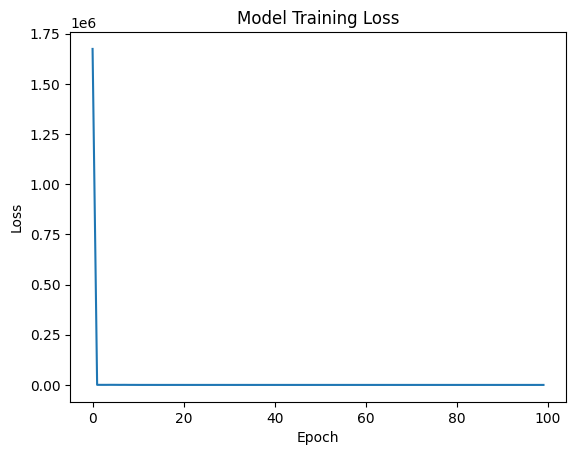

In [81]:
# Plot training loss over epochs
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Observations:

#### 1. Root Mean Squared Error (RMSE): The RMSE value calculated for the model's predictions on the test set is approximately 10.8. This value represents the average difference between the actual BodyFat values and the predicted values from the model. A lower RMSE indicates better predictive performance, and in this case, an RMSE of around 10.8 suggests that the model's predictions are reasonably accurate.

#### 2. Training Loss: The training loss reported at the end of the training process is approximately 59.7. This value represents the average loss calculated during each epoch of training. A decreasing training loss indicates that the model is learning and improving its ability to fit the training data. However, it's important to note that the training loss may not directly correlate with model performance on unseen data.

#### 3. Model Architecture: The neural network model used in this analysis consists of three hidden layers with 128, 64, and 32 units respectively. Each hidden layer uses the Rectified Linear Unit (ReLU) activation function, which introduces non-linearity to the model and allows it to capture complex relationships within the data. SInce it's a regressive model no activation is needed at the output layer.

#### 4. Correlation Matrix Heatmap: The correlation matrix heatmap provides insights into the relationships between different features in the dataset. This visualization helps identify potential correlations that might influence the prediction of BodyFat. For example, highly correlated features could be indicative of multicollinearity, which might affect the model's performance.

#### 5. Distribution of BodyFat: The histogram of the BodyFat distribution shows the frequency distribution of the target variable, Bell Shaped in this case, suggesting normal distribution. Understanding the distribution of the target variable is crucial as it can impact the model's ability to accurately predict values, especially in the case of imbalanced distributions.

#### Overall, the model's RMSE of around 10.8 indicates promising predictive performance on the test set. Further exploration and analysis could include hyperparameter tuning, different model architectures, and potentially addressing multicollinearity among features to potentially improve the model's performance.
